Date range: 2022-01-21 00:00:00 → 2024-12-31 00:00:00
Shape: (190757, 14)


,date,sku,brand,segment,category,channel,region,pack_type,price_unit,promotion_flag,delivery_days,stock_available,delivered_qty,units_sold
0,2022-01-21,MI-006,MiBrand1,Milk-Seg3,Milk,Retail,PL-Central,Multipack,2.38,0,1,141,128,9
1,2022-01-21,MI-006,MiBrand1,Milk-Seg3,Milk,Retail,PL-North,Single,1.55,1,3,0,129,0
2,2022-01-21,MI-006,MiBrand1,Milk-Seg3,Milk,Retail,PL-South,Carton,4.00,0,5,118,161,8
3,2022-01-21,MI-006,MiBrand1,Milk-Seg3,Milk,Discount,PL-Central,Single,5.16,0,2,81,114,7
4,2022-01-21,MI-006,MiBrand1,Milk-Seg3,Milk,Discount,PL-North,Single,7.66,0,4,148,204,12


<class 'pandas.DataFrame'>
Index: 190757 entries, 0 to 190756
Data columns (total 14 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   date             190757 non-null  datetime64[us]
 1   sku              190757 non-null  str           
 2   brand            190757 non-null  str           
 3   segment          190757 non-null  str           
 4   category         190757 non-null  str           
 5   channel          190757 non-null  str           
 6   region           190757 non-null  str           
 7   pack_type        190757 non-null  str           
 8   price_unit       190757 non-null  float64       
 9   promotion_flag   190757 non-null  int64         
 10  delivery_days    190757 non-null  int64         
 11  stock_available  190757 non-null  int64         
 12  delivered_qty    190757 non-null  int64         
 13  units_sold       190757 non-null  int64         
dtypes: datetime64[us](1), float64(1), in

None

,date,price_unit,promotion_flag,delivery_days,stock_available,delivered_qty,units_sold
count,190757,190757.000000,190757.000000,190757.000000,190757.000000,190757.000000,190757.000000
mean,2023-10-28 04:11:33.514786,5.251979,0.149200,3.004860,157.697652,179.333655,19.919709
min,2022-01-21 00:00:00,1.500000,0.000000,1.000000,-12.000000,-11.000000,-25.000000
25%,2023-04-16 00:00:00,3.380000,0.000000,2.000000,124.000000,152.000000,12.000000
50%,2023-11-12 00:00:00,5.250000,0.000000,3.000000,155.000000,179.000000,18.000000
75%,2024-06-07 00:00:00,7.130000,0.000000,4.000000,192.000000,206.000000,25.000000
max,2024-12-31 00:00:00,9.000000,1.000000,5.000000,405.000000,366.000000,139.000000
std,NaN,2.166705,0.356287,1.414626,52.736104,40.037475,11.770077


Unique SKUs: 30
Unique brands: 14
Unique regions: 3
Unique channels: 3


Series([], dtype: int64)

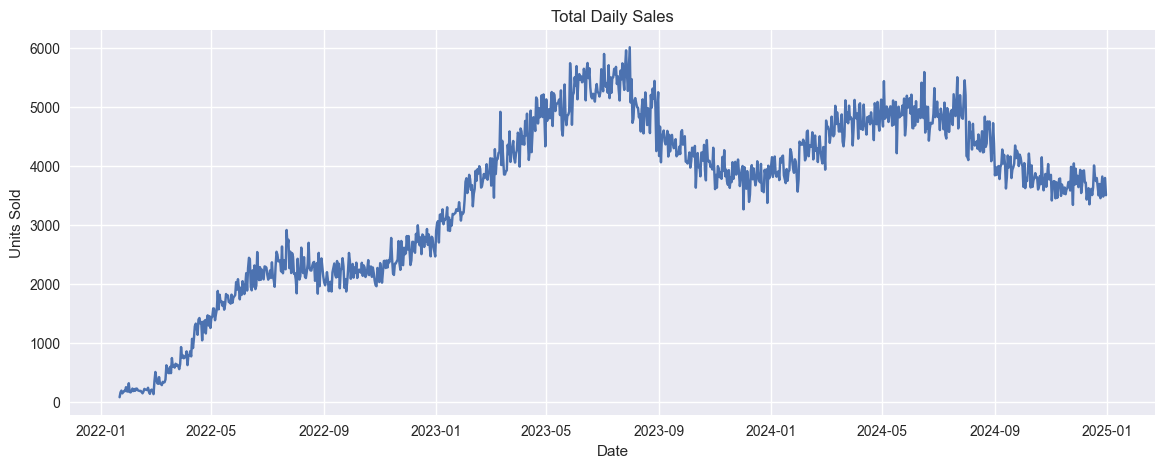

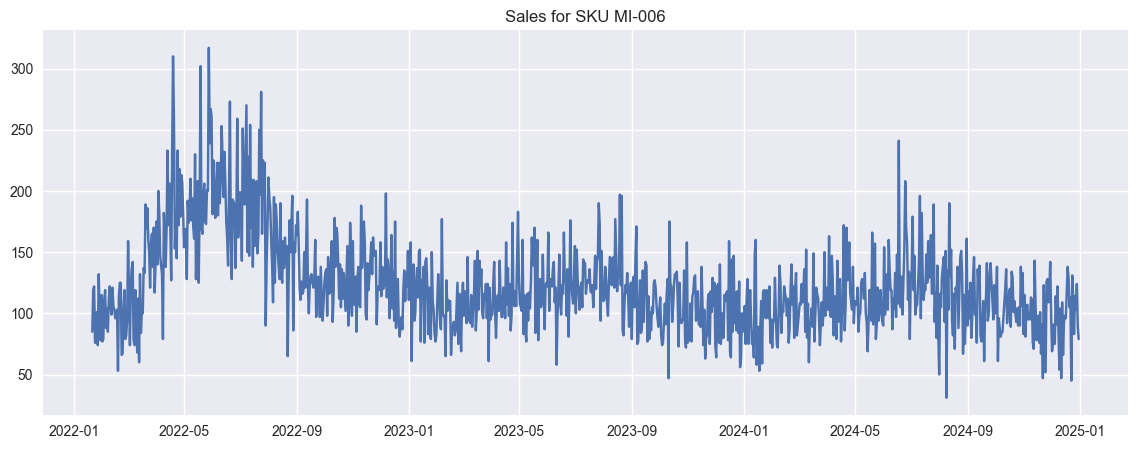

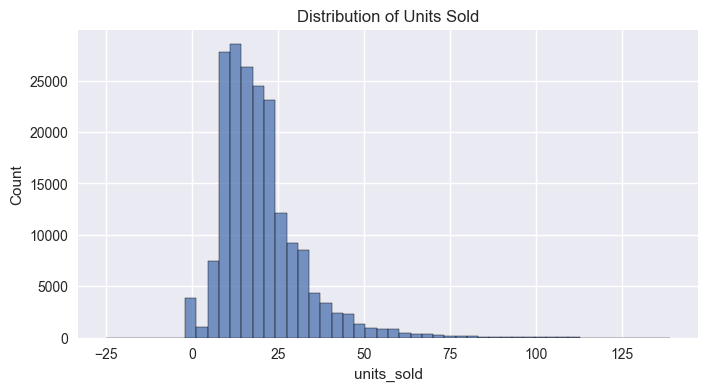

In [6]:
# ============================================
# 01 — DATA EXPLORATION
# ============================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use("seaborn-v0_8")
pd.set_option("display.max_columns", None)

# --------------------------------------------
# Load Data
# --------------------------------------------

df = pd.read_csv("../data/raw/FMCG_2022_2024.csv")

df['date'] = pd.to_datetime(df['date'])
df = df.sort_values('date')

print("Date range:", df['date'].min(), "→", df['date'].max())
print("Shape:", df.shape)

# --------------------------------------------
# Basic Info
# --------------------------------------------

display(df.head())
display(df.info())
display(df.describe())

print("Unique SKUs:", df['sku'].nunique())
print("Unique brands:", df['brand'].nunique())
print("Unique regions:", df['region'].nunique())
print("Unique channels:", df['channel'].nunique())

# --------------------------------------------
# Missing Values
# --------------------------------------------

missing = df.isna().sum()
display(missing[missing > 0])

# --------------------------------------------
# Aggregate Daily Sales
# --------------------------------------------

daily_sales = df.groupby('date')['units_sold'].sum().reset_index()

plt.figure(figsize=(14,5))
plt.plot(daily_sales['date'], daily_sales['units_sold'])
plt.title("Total Daily Sales")
plt.xlabel("Date")
plt.ylabel("Units Sold")
plt.show()

# --------------------------------------------
# SKU-level example
# --------------------------------------------

sample_sku = df['sku'].unique()[0]

sku_df = df[df['sku'] == sample_sku]
sku_daily = sku_df.groupby('date')['units_sold'].sum().reset_index()

plt.figure(figsize=(14,5))
plt.plot(sku_daily['date'], sku_daily['units_sold'])
plt.title(f"Sales for SKU {sample_sku}")
plt.show()

# --------------------------------------------
# Distribution of Target
# --------------------------------------------

plt.figure(figsize=(8,4))
sns.histplot(df['units_sold'], bins=50)
plt.title("Distribution of Units Sold")
plt.show()